#Border Gavaskar trophy Analysis


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('/content/BGTresults.csv')
df.head(5)

,Test Series Year,Test Number,Innings,Venue,Host,Highest Scorer,Team,Runs by highest scorer,best bowler,wickets by best bowler,team total,Winner,Win Margin,MOTM,Ind captain,Aus captain,MOTS,Series Win
0,1996-97,1,1,Delhi,India,Michael Slater,Australia,44,Anil Kumble,4.0,182/10,India,7w,Nayan Mongia,Sachin Tendulkar,Mark Taylor,Nayan Mongia,India
1,1996-97,1,2,Delhi,India,Nayan Mongia,India,152,Paul Reiffel,3.0,361/10,India,7w,Nayan Mongia,Sachin Tendulkar,Mark Taylor,Nayan Mongia,India
2,1996-97,1,3,Delhi,India,Steve Waugh,Australia,67,Anil Kumble,5.0,234/10,India,7w,Nayan Mongia,Sachin Tendulkar,Mark Taylor,Nayan Mongia,India
3,1996-97,1,4,Delhi,India,Mohd. Azharuddin,India,21,Paul Reiffel,2.0,56/3,India,7w,Nayan Mongia,Sachin Tendulkar,Mark Taylor,Nayan Mongia,India
4,1997-98,1,1,Chennai,India,Navjot Sidhu,India,62,Shane Warne,4.0,257/10,India,179r,Sachin Tendulkar,Mohd. Azharuddin,Mark Taylor,Sachin Tendulkar,India


We can see that the winner are displayed for every inning so we can't use value count directly we need to Group the Data according to Test Series Year and Test Number

In [ ]:
df1=df.groupby(["Test Series Year","Test Number"])["Winner","Host"].first()
df1=df1.reset_index()
df1.head()

<ipython-input-9-7859054beda2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1=df.groupby(["Test Series Year","Test Number"])["Winner","Host"].first()


,Test Series Year,Test Number,Winner,Host
0,1996-97,1,India,India
1,1997-98,1,India,India
2,1997-98,2,India,India
3,1997-98,3,Australia,India
4,1999-00,1,Australia,Australia


Text(0.5, 0, 'NO. OF MATCHES')

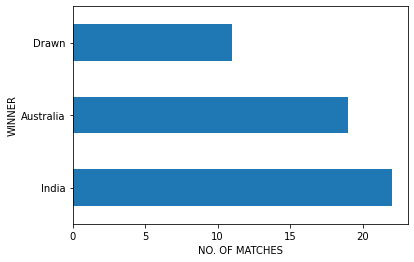

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df1["Winner"].value_counts().plot(kind="barh")
plt.ylabel("WINNER")
plt.xlabel("NO. OF MATCHES")

India has won more matches than Australia

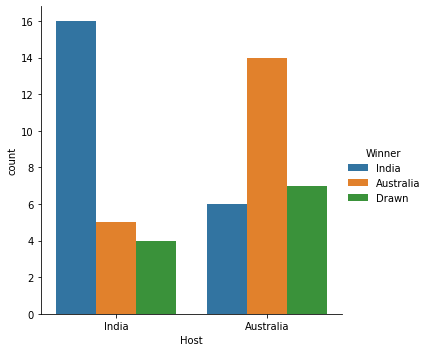

In [ ]:
sns.catplot(x="Host",hue="Winner",kind="count",data=df1)

India are dominating at Home while most of the matches at Australia are without Result

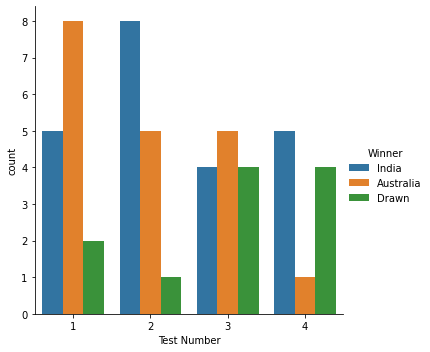

In [ ]:
sns.catplot(x="Test Number",hue="Winner",kind="count",data=df1)

It is seen that Australia mostly takes lead at the First Match but India is ready with a comeback

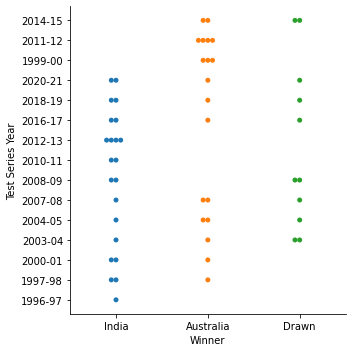

In [ ]:
sns.catplot(x="Winner",y="Test Series Year",kind="swarm",data=df1)

We can See that in the past few years Australia were Dominating

Text(0, 0.5, 'Total Innings')

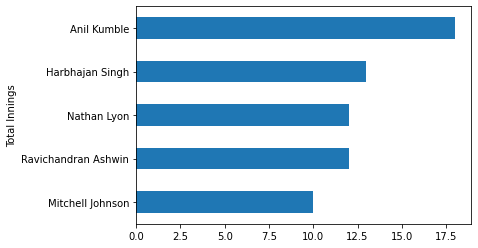

In [ ]:
df.groupby("best bowler")["best bowler"].count().sort_values().tail().plot(kind="barh")
plt.ylabel("Total Innings")

Domanating Bowlers

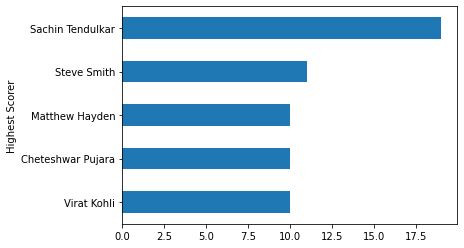

In [ ]:
df.groupby("Highest Scorer")["Highest Scorer"].count().sort_values().tail().plot(kind="barh")

Domanating batsmen

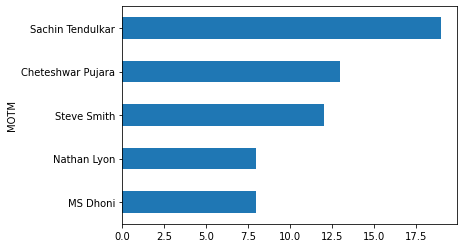

In [ ]:
df.groupby("MOTM")["MOTM"].count().sort_values().tail().plot(kind="barh")

Most man of the match

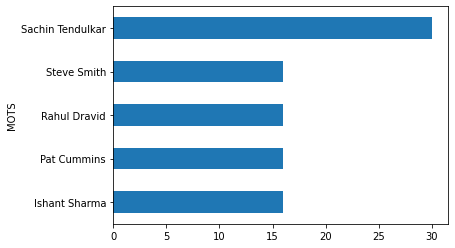

In [ ]:
df.groupby("MOTS")["MOTS"].count().sort_values().tail().plot(kind="barh")

Most Man of the series

In [ ]:
df2=df.groupby(["Test Series Year","Test Number"])["Winner","Ind captain","Aus captain"].first()
df2=df2.reset_index()
df2.head()

<ipython-input-18-5fe20ffd53f3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2=df.groupby(["Test Series Year","Test Number"])["Winner","Ind captain","Aus captain"].first()


,Test Series Year,Test Number,Winner,Ind captain,Aus captain
0,1996-97,1,India,Sachin Tendulkar,Mark Taylor
1,1997-98,1,India,Mohd. Azharuddin,Mark Taylor
2,1997-98,2,India,Mohd. Azharuddin,Mark Taylor
3,1997-98,3,Australia,Mohd. Azharuddin,Mark Taylor
4,1999-00,1,Australia,Sachin Tendulkar,Steve Waugh


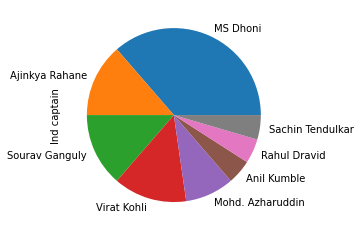

In [ ]:
ind_W=df2[df2["Winner"]=="India"]
ind_W.groupby("Ind captain")["Ind captain"].count().sort_values(ascending=False).plot(kind="pie")

MS Dhoni was the most successful captain for India

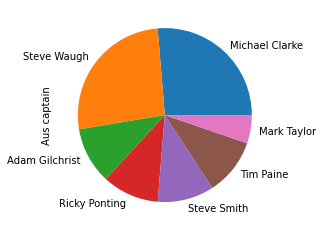

In [ ]:
aus_W=df2[df2["Winner"]=="Australia"]
aus_W.groupby("Aus captain")["Aus captain"].count().sort_values(ascending=False).plot(kind="pie")

Michael Clarke and Steve Waugh were successful captains for Australia

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Test Series Year        200 non-null    object 
 1   Test Number             200 non-null    int64  
 2   Innings                 200 non-null    int64  
 3   Venue                   200 non-null    object 
 4   Host                    200 non-null    object 
 5   Highest Scorer          200 non-null    object 
 6   Team                    200 non-null    object 
 7   Runs by highest scorer  200 non-null    int64  
 8   best bowler             200 non-null    object 
 9   wickets by best bowler  199 non-null    float64
 10  team total              200 non-null    object 
 11  Winner                  200 non-null    object 
 12  Win Margin              200 non-null    object 
 13  MOTM                    200 non-null    object 
 14  Ind captain             200 non-null    ob

In [ ]:
x = df.iloc[:,1:3].values
x

In [ ]:
y = df.iloc[:,11].values
y

In [ ]:
df['Winner'].value_counts()

India        86
Australia    73
Drawn        41
Name: Winner, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [ ]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(200, 2)
(150, 2)
(50, 2)


In [ ]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(200,)
(150,)
(50,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)
y_pred

In [ ]:
y_test

#Accuracy of the Model

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)* 100

52.0

In [ ]:
a = scaler.transform([[25,50000]])
a

array([[8.00000000e+00, 1.66663333e+04]])

In [ ]:
model.predict(a)

array(['India'], dtype=object)

In [ ]:
b = scaler.transform([[50,35000]])
b

array([[   16.33333333, 11666.33333333]])

In [ ]:
model.predict(b)

array(['India'], dtype=object)